In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('synthetic.csv')

In [5]:
df.sample(10)

,Category,Price,Rating,Stock,Discount
4019,D,9091.0,3.296486,Out of Stock,32.0
2424,NaN,528.0,NaN,In Stock,17.0
2254,NaN,9038.0,3.792991,Out of Stock,49.0
3285,NaN,6458.0,4.372465,Out of Stock,42.0
3587,NaN,911.0,2.488422,In Stock,39.0
3093,NaN,4537.0,3.914490,NaN,1.0
3777,NaN,7210.0,2.764944,Out of Stock,14.0
1101,NaN,231.0,1.444400,In Stock,38.0
280,D,3064.0,1.783515,Out of Stock,22.0
3817,NaN,2433.0,NaN,In Stock,16.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4362 entries, 0 to 4361
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  1614 non-null   object 
 1   Price     4188 non-null   float64
 2   Rating    2312 non-null   float64
 3   Stock     3010 non-null   object 
 4   Discount  3970 non-null   float64
dtypes: float64(3), object(2)
memory usage: 170.5+ KB


In [7]:
df.isnull().sum()

Category    2748
Price        174
Rating      2050
Stock       1352
Discount     392
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,Category,Price,Rating,Stock,Discount
6,C,667.0,3.668341,In Stock,41.0
7,A,7125.0,4.983998,Out of Stock,7.0
8,A,2777.0,2.678384,In Stock,6.0
11,A,3772.0,4.890750,In Stock,45.0
15,A,7936.0,3.032832,In Stock,44.0


In [10]:
df.shape

(540, 5)

In [11]:
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['Discount', 'Category', 'Stock'], axis = 1), df['Discount'], test_size = 0.3, random_state = 0)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # it is in numpy array 
X_test_scaled = scaler.transform(X_test) # it is in numpy array

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

X_train_scaled.shape, X_test_scaled.shape

((378, 2), (162, 2))

In [13]:
X_train_scaled.head(5)

,Price,Rating
0,1.070079,-1.620103
1,0.710403,1.277597
2,1.068357,0.977672
3,0.053751,0.495349
4,-0.735540,0.302984


In [14]:
np.round(X_train.describe(), 2)

,Price,Rating
count,378.00,378.00
mean,5153.98,3.10
std,2906.45,1.12
min,119.00,1.00
25%,2507.75,2.13
50%,5226.00,3.14
75%,7835.75,4.06
max,9891.00,4.99


In [15]:
np.round(X_train_scaled.describe(), 2)

,Price,Rating
count,378.00,378.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.73,-1.88
25%,-0.91,-0.86
50%,0.02,0.04
75%,0.92,0.86
max,1.63,1.70


<Axes: xlabel='Price', ylabel='Rating'>

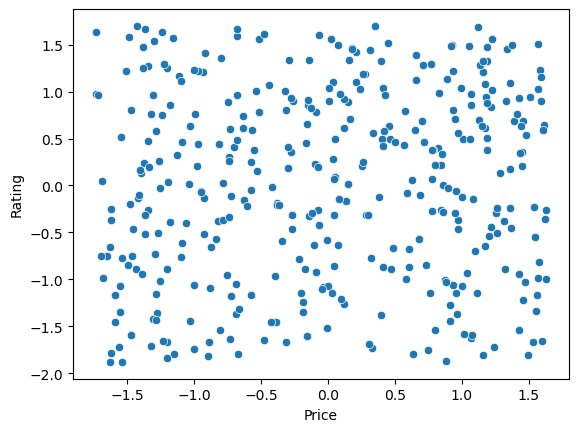

In [16]:
sns.scatterplot(x = X_train_scaled['Price'], y = X_train_scaled['Rating'])

<Axes: xlabel='Price', ylabel='Rating'>

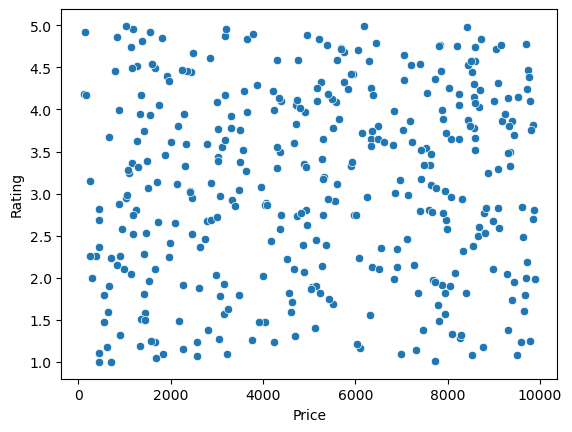

In [17]:
sns.scatterplot(x = X_train['Price'], y = X_train['Rating'])

In [22]:
# There is no difference in the scatter plot have different scaling in their x and y axis..
h = pd.DataFrame({'Price':[25,30,35,20000], 'Rating':[1,1,1,5]})
X_train = pd.concat([X_train,h], axis = 0, ignore_index = True)

In [23]:
X_train.tail()

,Price,Rating
381,20000.0,5.0
382,25.0,1.0
383,30.0,1.0
384,35.0,1.0
385,20000.0,5.0


<Axes: xlabel='Price', ylabel='Rating'>

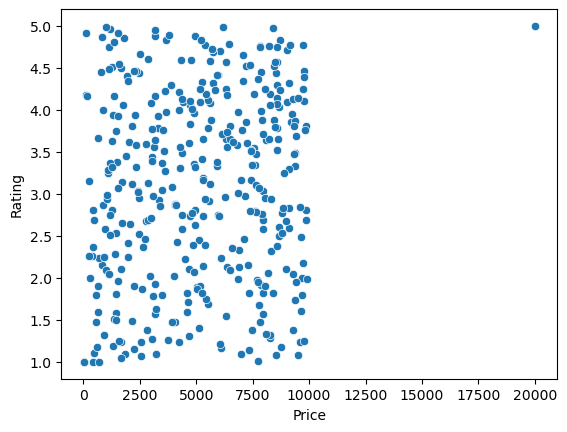

In [25]:
sns.scatterplot(x = X_train['Price'], y = X_train['Rating'])

In [26]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [29]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

<Axes: xlabel='Price', ylabel='Rating'>

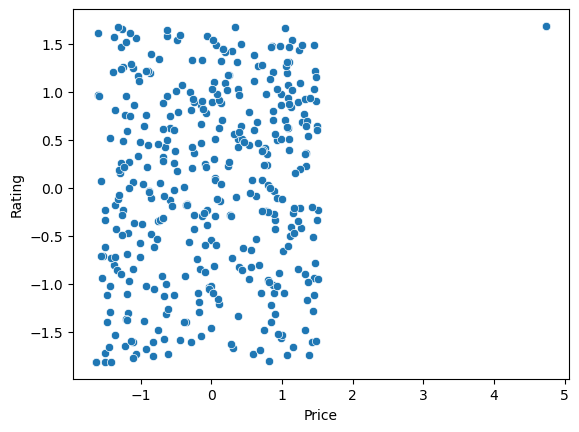

In [30]:
sns.scatterplot(x = X_train_scaled['Price'], y = X_train_scaled['Rating'])

# After scaling there is no impact on outliers ...only scale is changed..

C:\Users\abhay\AppData\Local\Temp\ipykernel_12580\3810037994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled[X_train_scaled['Rating'] < 0]['Price'], hist = False)
C:\Users\abhay\AppData\Local\Temp\ipykernel_12580\3810037994.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Price', ylabel='Density'>

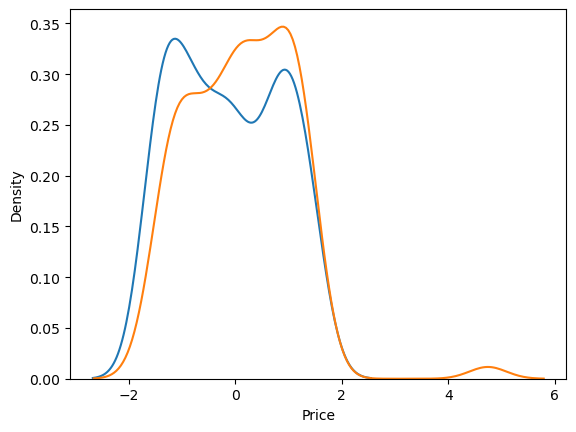

In [35]:
sns.distplot(X_train_scaled[X_train_scaled['Rating'] < 0]['Price'], hist = False)
sns.distplot(X_train_scaled[X_train_scaled['Rating'] >= 0]['Price'], hist = False)